In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [60]:
df=pd.read_csv('customer_churn.csv')
df.drop("CustomerID",axis=1)

,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Male,58,3,73819.57,1,0,0,42115.00,0
1,Female,47,4,198351.81,1,0,0,136770.95,0
2,Male,34,5,46307.11,4,1,0,120984.43,1
3,Male,66,4,229438.12,2,1,1,29942.39,0
4,Male,37,6,106131.86,3,0,0,148274.78,1
...,...,...,...,...,...,...,...,...,...
795,Male,49,8,200088.72,3,1,0,36522.51,0
796,Male,63,6,165666.13,4,1,0,44606.87,0
797,Male,60,9,23071.20,4,0,1,79713.09,0
798,Male,33,6,149080.38,2,1,1,117776.73,0


In [61]:
for i in df.select_dtypes(include="object").columns:
    df[i]=LabelEncoder().fit_transform(df[i])
df

,CustomerID,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,1,58,3,73819.57,1,0,0,42115.00,0
1,1,0,47,4,198351.81,1,0,0,136770.95,0
2,2,1,34,5,46307.11,4,1,0,120984.43,1
3,3,1,66,4,229438.12,2,1,1,29942.39,0
4,4,1,37,6,106131.86,3,0,0,148274.78,1
...,...,...,...,...,...,...,...,...,...,...
795,795,1,49,8,200088.72,3,1,0,36522.51,0
796,796,1,63,6,165666.13,4,1,0,44606.87,0
797,797,1,60,9,23071.20,4,0,1,79713.09,0
798,798,1,33,6,149080.38,2,1,1,117776.73,0


In [62]:
x=df[["Balance","IsActiveMember"]]
y=df["Exited"]

In [63]:
scalar=StandardScaler()
x_scalar=scalar.fit_transform(x)
x_scalar

array([[-0.66904365, -0.99252792],
       [ 1.05619499, -0.99252792],
       [-1.05019442, -0.99252792],
       ...,
       [-1.37209893,  1.00752834],
       [ 0.37360087,  1.00752834],
       [ 0.21172713, -0.99252792]])

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x_scalar,y,test_size=0.2,random_state=42)

accuracy for kernal linear:71.88%


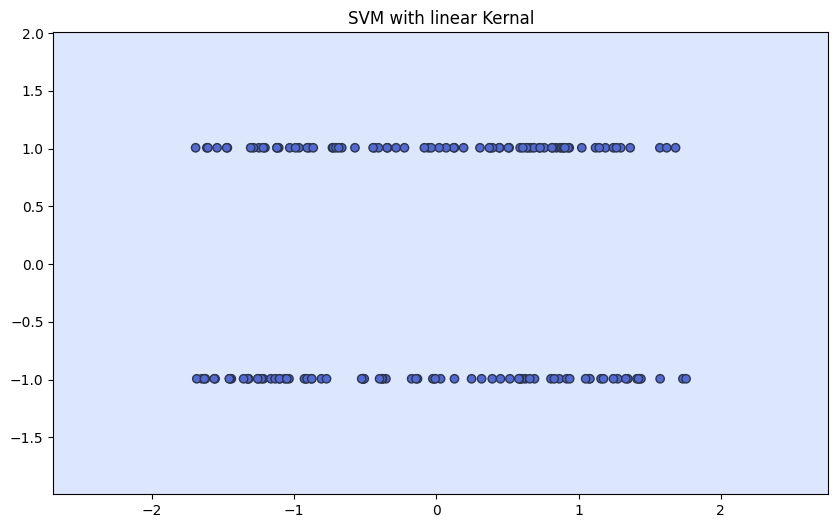

accuracy for kernal poly:71.88%


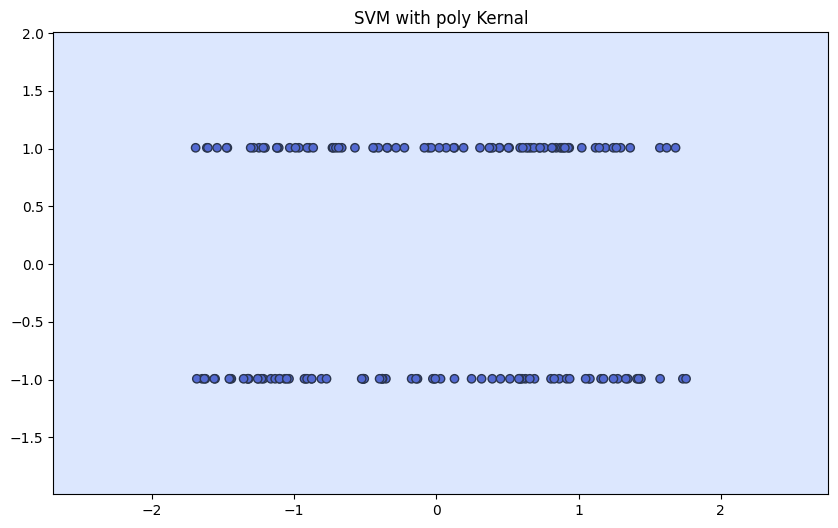

accuracy for kernal rbf:71.88%


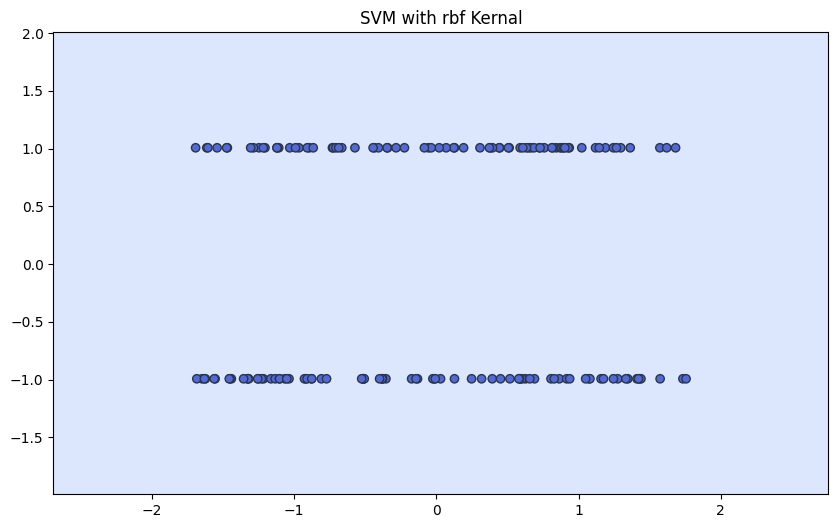

accuracy for kernal sigmoid:62.50%


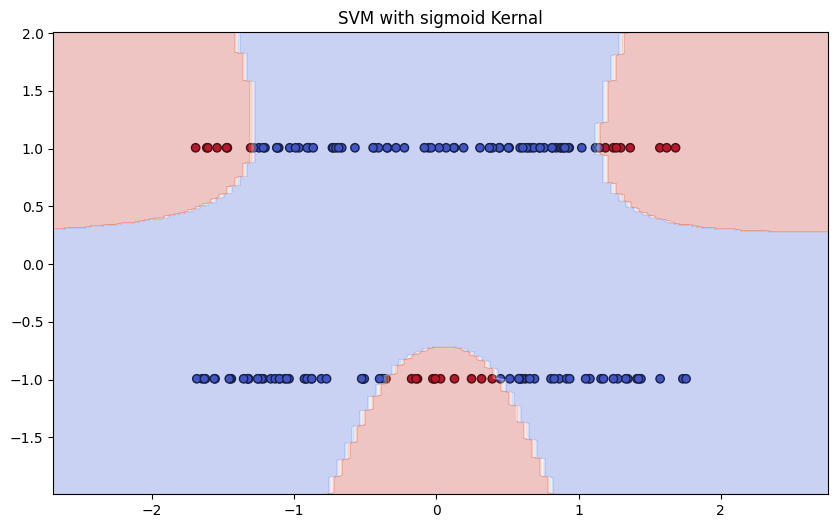

In [65]:
kernal=['linear','poly','rbf','sigmoid']
for i in kernal:
  model=SVC(kernel=i,degree=3,gamma="auto")
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  print(f"accuracy for kernal {i}:{accuracy*100:.2f}%")
  plt.figure(figsize=(10,6))
  plt.scatter(x_test[:,0],x_test[:,1],c=y_pred,cmap='coolwarm',edgecolors='k')
  x_min,x_max=x_test[:,0].min()-1,x_test[:,0].max()+1
  y_min,y_max=x_test[:,1].min()-1,x_test[:,1].max()+1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,300))
  z=model.predict(np.c_[xx.ravel(),yy.ravel()])
  plt.contourf(xx,yy,z.reshape(xx.shape),alpha=0.3,cmap='coolwarm')
  plt.title(f'SVM with {i} Kernal')

  plt.show()

In [66]:
new_data=pd.DataFrame({'Balance':[10000],'IsActiveMember':[1]})
predict=model.predict(scalar.transform(new_data))
predict

array([1])